# Kevin Alvarez CSC 217 Fall 2019 Homework 11

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../utils')))
import _utils as utils
%matplotlib inline

This week, we'll be looking at a dataset showing the housing values in the suburbs of Boston. Every row is a different town.

## Housing Values in Suburbs of Boston

The medv variable is the target variable.

Data description  
The Boston data frame has **506 rows and 14 columns**.

This data frame contains the following columns:

**crim**  
per capita crime rate by town.

**zn**  
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**  
proportion of non-retail business acres per town.

**chas**  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**  
nitrogen oxides concentration (parts per 10 million).

**rm**  
average number of rooms per dwelling.

**age**  
proportion of owner-occupied units built prior to 1940.

**dis**  
weighted mean of distances to five Boston employment centres.

**rad**  
index of accessibility to radial highways.

**tax**  
full-value property-tax rate per $10,000.

**ptratio**   
pupil-teacher ratio by town.

**lstat**  
lower status of the population (percent).

**medv**  
median value of owner-occupied homes in $1000s.

I've also added:  

**RM_Discrete**  
1 if average number of rooms per dwelling is greater than 7, 0 if it's 7 or less

In [2]:
boston = pd.read_csv('data/boston_dataset.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,RM_Discrete
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,1


1) First, let's look at the relationship between the RM variable and MEDV. How does the number of rooms per dwelling impact the median value of a home in a given town?

Create a scatterplot between these two variables. Does this look like a strong correlation? Does the relationship look linear?

Text(0.5, 0.92, 'RM : MEDV Scattler Plot')

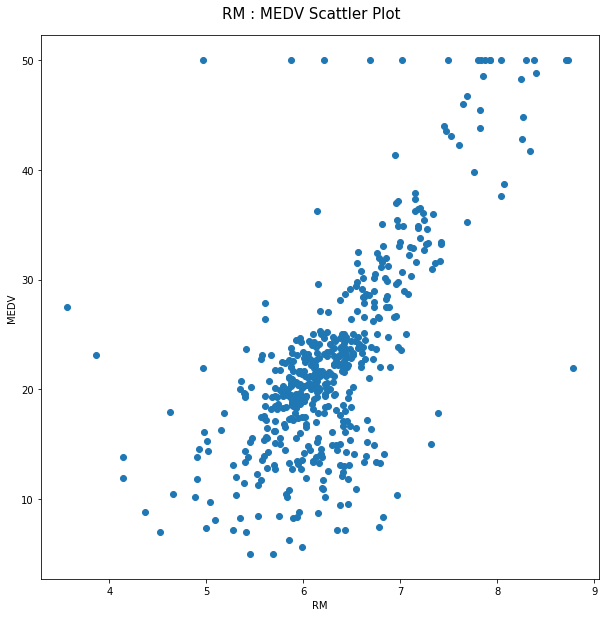

In [3]:
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['RM'], boston['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
fig.suptitle('RM : MEDV Scattler Plot', fontsize=15, y=0.92)

2) What is the correlation between these two variables?

In [4]:
print('Correlation:', stats.pearsonr(boston['RM'], boston['MEDV'])[0])

Correlation: 0.6953599470715394


3) Now fit a regression between these two variables. What is the slope? What is the intercept? What is the R-squared value? Given the R-squared value, how well would you say the number of rooms can help you predict what the price of a home will be?

In [5]:
boston_slope, boston_intercept, boston_predictions, boston_residuals = utils.evaluate_linear_relationship(boston['RM'], boston['MEDV'])
print('Intercept:', boston_intercept)
print('Slope:', boston_slope)
print('R-Squared Value:', utils.get_r2(boston_predictions, boston['MEDV']))
print('RMSE Value:', utils.get_rmse(boston_predictions, boston['MEDV']))

Intercept: -34.67062077643854
Slope: 9.102108981180306
R-Squared Value: 0.48352545599133323
RMSE Value: 6.603071389222562


4) Now re-run this using the statsmodels OLS function (smf.ols). Are the results (slope, intercept, r-squared value) the same?

In [6]:
est = smf.ols('MEDV ~ RM',boston).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           2.49e-74
Time:                        17:42:31   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5) Now fit a regression between the 'RM_Discrete' variable and the 'MEDV' variable. What is the slope? What is the intercept? What is the interpretation of the slope? What is the R-squared value? Given the R-squared value, how well would you say this binary predictor can help you predict what the price of a home will be?

In [7]:
boston_slope, boston_intercept, boston_predictions, boston_residuals = utils.evaluate_linear_relationship(boston['RM_Discrete'], boston['MEDV'])
print('Intercept:', boston_intercept)
print('Slope:', boston_slope)
print('R-Squared Value:', utils.get_r2(boston_predictions, boston['MEDV']))
print('RMSE Value:', utils.get_rmse(boston_predictions, boston['MEDV']))

Intercept: 20.235746606334846
Slope: 18.16112839366516
R-Squared Value: 0.4316619841971687
RMSE Value: 6.926676189973861


6) Plot the residuals plot for this relationship. Do the residuals look heteroskedastic (not evenly distributed) or homoskedastic (evently distributed)? Remember that values will only show up as 0 or 1 on the x-axis, you are only looking at the distribution on the y-axis.

Text(0.5, 0.92, 'Residuals')

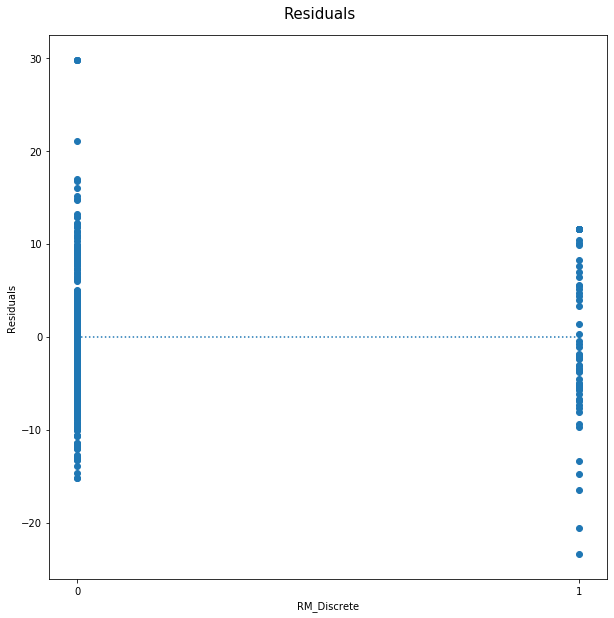

In [8]:
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['RM_Discrete'], boston_residuals)
plt.plot([0, boston['RM_Discrete'].max()], [0,0], linestyle='dotted')
plt.xlabel('RM_Discrete')
plt.ylabel('Residuals')
plt.xticks([0,1])
fig.suptitle('Residuals', fontsize=15, y=0.92)

7) Now let's look at the relationship between the 'LSAT' and 'MEDV' variable. How does the percentage of the 'lower status' of a population in a given town affect the median value of a home in that town?

Create a scatterplot between these two variables. Does this look like a strong correlation? Does the relationship look linear?

Text(0.5, 0.92, 'LSAT : MEDV Scattler Plot')

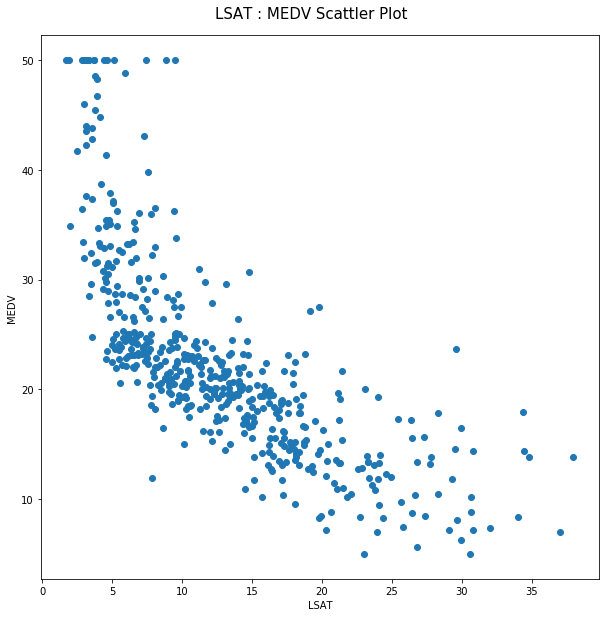

In [9]:
fig = plt.figure(figsize=(10,10))
plt.scatter(boston['LSTAT'], boston['MEDV'])
plt.xlabel('LSAT')
plt.ylabel('MEDV')
fig.suptitle('LSAT : MEDV Scattler Plot', fontsize=15, y=0.92)

8) Now evaluate the RMSE between the relationship between the 'LSTAT' and 'MEDV' columns for the polynomials 1 through 20. Which degree of polynomial has the lowest corresponding RMSE?

In [10]:
min_degree = 1
min_rmse = 200000
for i in range(1,21):
    order_variables = np.polyfit(boston['LSTAT'], boston['MEDV'], i)
    order_function = np.poly1d(order_variables)
    order_predictions = order_function(boston['LSTAT'])
    rmse = utils.get_rmse(order_predictions, boston['LSTAT'])
    if(rmse < min_rmse):
        min_degree = i
        min_rmse = rmse
    print('Degree:', i , 'RMSE:',rmse)
print('MIN at degree',i,'with RMSE:',min_rmse)

Degree: 1 RMSE: 17.062926948526098
Degree: 2 RMSE: 17.30017119004257
Degree: 3 RMSE: 17.34191722277036
Degree: 4 RMSE: 17.37878913014779
Degree: 5 RMSE: 17.399851509550764
Degree: 6 RMSE: 17.40225719889113
Degree: 7 RMSE: 17.402471264705678
Degree: 8 RMSE: 17.405042790987103
Degree: 9 RMSE: 17.40906431203859
Degree: 10 RMSE: 17.412117989645473
Degree: 11 RMSE: 17.41716844864799
Degree: 12 RMSE: 17.418134033962943
Degree: 13 RMSE: 17.41899240196079
Degree: 14 RMSE: 17.426663608455133
Degree: 15 RMSE: 17.43095738228653
Degree: 16 RMSE: 17.434305548606165
Degree: 17 RMSE: 17.434773740705086
Degree: 18 RMSE: 17.43499121663019
Degree: 19 RMSE: 17.435346449461996
Degree: 20 RMSE: 17.43534745090256
MIN at degree 20 with RMSE: 17.062926948526098


C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


9) Now split the dataset into training and testing sets like we did in class, and evaluate the RMSE for both the training and testing sets. Plot a graph showing the corresponding RMSE values for the training and testing sets. At what degree polynomial do we approximately have the RMSE for the training and testing sets? Remember that we are not looking for the absolute lowest values necessarily, just the point at which the RMSE doesn't seem to be notably improving any further, and certainly not going higher in either the training or testing sets. Feel free to use both a dataframe and graph to analyze this.

In [11]:
x_train, x_test, y_train, y_test = utils.get_train_test(boston['LSTAT'], boston['MEDV'])
print('train_values - LSTAT:', x_train)
print('test_values - LSTAT:', x_test)
print('train_values - MEDV:', y_train)
print('test_values - MEDV:', y_test)

train_values - LSTAT: [ 4.98  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1  20.45 13.27 15.71
 10.26  8.47  6.58 14.67 11.69 11.28 18.72 19.88 16.3  16.51 14.81 17.28
 12.8  11.98 22.6  13.04 27.71 18.35  9.68 11.41  8.77 10.13  4.32  1.98
  4.84  5.81  9.55 10.21 14.15 18.8   9.43  4.81  5.77  3.95  9.22 13.15
 14.44  6.73  9.5   8.05  4.67 10.24  8.1  13.09  8.79  6.72  5.52  7.54
  6.78  8.94 11.97 10.27 12.34  9.1   7.22  6.72  7.51  9.62  6.53 12.86
  5.7   8.81  8.16  6.21 10.59  6.65 11.34  4.21  3.57  9.42  7.67 13.44
 12.33 14.09 12.27 15.55 13.   10.16 16.21 17.09 10.45 15.76 12.04 10.3
 15.37 13.61 14.37 17.93 25.41 17.58 14.81 27.26 17.19 15.39 18.34 12.26
 11.12 15.03 16.96 16.9  14.59 21.32 18.46 24.16 34.41 26.82 26.42 29.29
 27.8  16.65 29.53 28.32 14.1  12.12 15.79 15.12 15.02 16.14  4.59  6.43
  7.39  1.92  3.32 11.64  9.81 12.14 11.1  14.43 12.03 14.69  9.04  5.33
 10.11  6.29  6.92  5.04  7.56  9.45  4.82  5.68 13.98 13.15  4.45  2.87
  5.03  4.38  2.97  4.08  8.61

In [12]:
polynomials = []
train_rmse = []
test_rmse = []
for i in range(1, 21):
    polynomials.append(i)
    variables = np.polyfit(x_train, y_train, i)
    function = np.poly1d(variables)
    train_predictions = function(x_train)
    train_rmse.append(utils.get_rmse(train_predictions, y_train))
    test_predictions = function(x_test)
    test_rmse.append(utils.get_rmse(test_predictions, y_test))
df = pd.DataFrame()
df['polynomials'] = polynomials
df['train_rmse'] = train_rmse
df['test_rmse'] = test_rmse
df

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


,polynomials,train_rmse,test_rmse
0,1,6.174272,6.103443
1,2,5.442966,5.601236
2,3,5.300723,5.503173
3,4,5.153035,5.464241
4,5,5.085287,5.411756
5,6,5.078756,5.392248
6,7,5.078702,5.391001
7,8,5.063041,5.400141
8,9,5.032776,5.509465
9,10,5.019640,5.513379


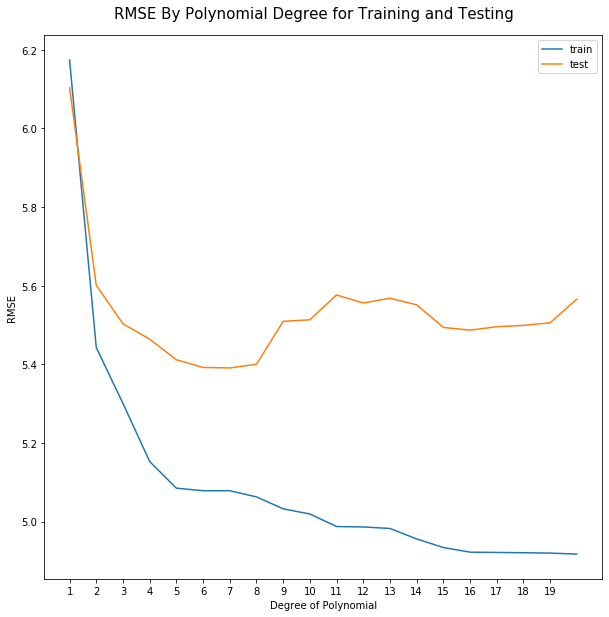

In [13]:
fig = plt.figure(figsize=(10,10))
plt.plot(df['polynomials'], df['train_rmse'], label='train')
plt.plot(df['polynomials'], df['test_rmse'], label='test')
plt.xticks(range(1,20))
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
fig.suptitle('RMSE By Polynomial Degree for Training and Testing', fontsize=15, y=0.92)
plt.legend()

10) Using seaborn's 'pairplot' function, run a pairplot of this dataset and look at the relationship between the 'MEDV' variable and the other continuous varibles in the dataset. Which variables does MEDV look to have the strongest (positive) correlation with?

In [ ]:
sns.pairplot(boston)

BONUS: 11) Now run a multivariate regression using the following variables as predictors:

ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT

Against MEDV as a response variable.

Which of these varibles have a statistically significant slope? What is the total R-squared value of the model?

In [ ]:
est = smf.ols('MEDV ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + LSTAT', boston).fit()
est.summary()